In [2]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (4, 3)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArViz v{az.__version__}")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Running on PyMC v5.7.2
Running on ArViz v0.15.1


- よく使われる確率分布を実装してみる
  - ベルヌーイ分布
  - 二項分布
  - 正規分布
  - 一様分布
  - ベータ分布
  - 半正規分布 

Sampling: [x]


[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

,mean,sd,hdi_3%,hdi_97%
x,0.512,0.500,0.000,1.000


Text(0.5, 1.0, 'ベルヌーイ分布\u3000p=0.5')

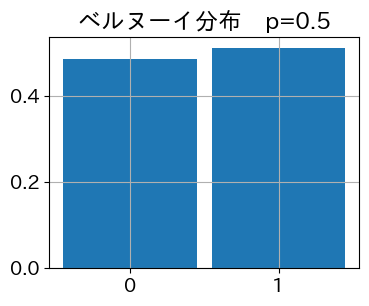

In [5]:
#
# ベルヌーイ分布
#

p = 0.5

model1 = pm.Model()
with model1:
    # pm.Bernoulli: ベルヌーイ分布
    # p: くじに当たる確率
    x = pm.Bernoulli('x', p=p)

    # 事前分布のサンプリング
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

    # 事前分布からのサンプル抽出
    x_samples1 = prior_samples1['prior']['x'].values

# サンプリング結果の表示
print(x_samples1)
# サンプリング結果の統計分析
summary1 = az.summary(prior_samples1, kind='stats')
display(summary1)
# サンプリング結果の可視化
ax = az.plot_dist(x_samples1)
ax.set_title(f'ベルヌーイ分布　p={p}')

Sampling: [x]


[[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3 1 4 0 4 4 2 2 1 4
  1 3 2 0 0 3 2 2 3 3 4 4 2 1 2 3 2 2 

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


Text(0.5, 1.0, '二項分布\u3000p=0.5, n=5')

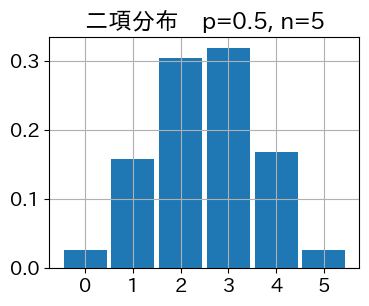

In [6]:
#
# 二項分布
#

# パラメータ設定
p = 0.5
n = 5

model2 = pm.Model()
with model2:
    # pm.Binomial: 二項分布
    # p: くじに当たる確率
    # n: 試行回数
    x = pm.Binomial('x', p=p, n=n)

    # 事前分布のサンプリング
    prior_samples2 = pm.sample_prior_predictive(random_seed=42)
    # 事前分布からのサンプル抽出
    x_samples2 = prior_samples2['prior']['x'].values
# サンプリング結果の表示
print(x_samples2)
# サンプリング結果の統計分析
summary2 = az.summary(prior_samples2, kind='stats')
display(summary2)
# サンプリング結果の可視化
ax = az.plot_dist(x_samples2)
ax.set_title(f'二項分布　p={p}, n={n}')

In [11]:
# sklearnからirisデータセットを読み込み
from sklearn.datasets import load_iris
iris = load_iris()
# データフレームに変換
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.100,3.500,1.400,0.200
1,4.900,3.000,1.400,0.200
2,4.700,3.200,1.300,0.200
3,4.600,3.100,1.500,0.200
4,5.000,3.600,1.400,0.200


In [14]:
iris.target_names
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
#
# 正規分布
#

# 自然界の様々なデータ分布が正規分布で近似できることが知られている
# アイリスデータセットから，setosa種のがく片の長さ(sepal length)を抽出して調査

# 書籍ではsnsだけどskeleenでとってくる(なんか取れないから)

df = sns.load_dataset('iris')

# setosaの行のみ抽出
df1 = df.query('species == "setosa"')

bins = np.arange(4.0, 6.2, 0.2)
# 分布の確認
sns.histplot(df1, x='sepal_length', bins=bins, kde=True)
plt.xticks(bins)

ValueError: 'iris' is not one of the example datasets.